In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
nx.__version__

'1.11'

####Using 
 * http://networkx.readthedocs.io/en/networkx-1.11/tutorial/ 
 * http://www.cl.cam.ac.uk/~cm542/teaching/2011/stna-pdfs/stna-lecture11.pdf

In [3]:
M=nx.read_gml("polblogs.gml")

In [4]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

In [5]:
#looking at a few nodes
nodes = pd.DataFrame(G.nodes())
nodes.head()

0
0  tsrightdominion.blogspot.com
1              rightrainbow.com
2      truebluegal.blogspot.com
3     newleftblogs.blogspot.com
4            stitt.blogspot.com

In [6]:
#Looking at a few edges
edges = pd.DataFrame(G.edges())
edges.head()

0                                      1
0  tsrightdominion.blogspot.com              democraticunderground.com
1  tsrightdominion.blogspot.com                   conservativepunk.com
2  tsrightdominion.blogspot.com                         anncoulter.org
3  tsrightdominion.blogspot.com                           aldaynet.org
4  tsrightdominion.blogspot.com  gevkaffeegal.typepad.com/the_alliance

In [7]:
G.number_of_edges()

16711

In [8]:
G.number_of_nodes()

1224

In [9]:
#Looking at neighbors of one node
G.neighbors('tsrightdominion.blogspot.com')

[u'democraticunderground.com',
 u'conservativepunk.com',
 u'anncoulter.org',
 u'aldaynet.org',
 u'gevkaffeegal.typepad.com/the_alliance',
 u'coxandforkum.com',
 u'wonkette.com',
 u'hughhewitt.com',
 u'blogsforbush.com',
 u'drudgereport.com',
 u'blogsagainsthillary.com',
 u'californiaconservatives4truth.blogspot.com',
 u'rightwingnews.com',
 u'scrappleface.com',
 u'michellemalkin.com',
 u'americandinosaur.blogspot.com',
 u'madtechspeaks.blogspot.com',
 u'dissectleft.blogspot.com',
 u'freerepublic.com',
 u'dailykos.com',
 u'legendgames.net/myblog.asp']

### 1.  Create a nice looking graph of the political blog network

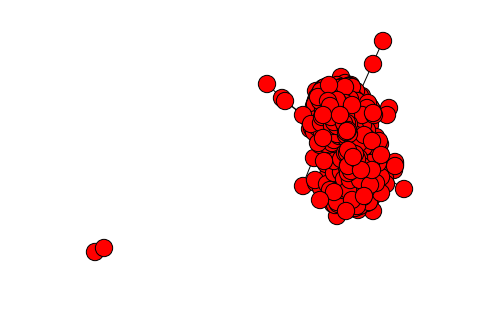

In [10]:
#An ugly graph
nx.draw(G)

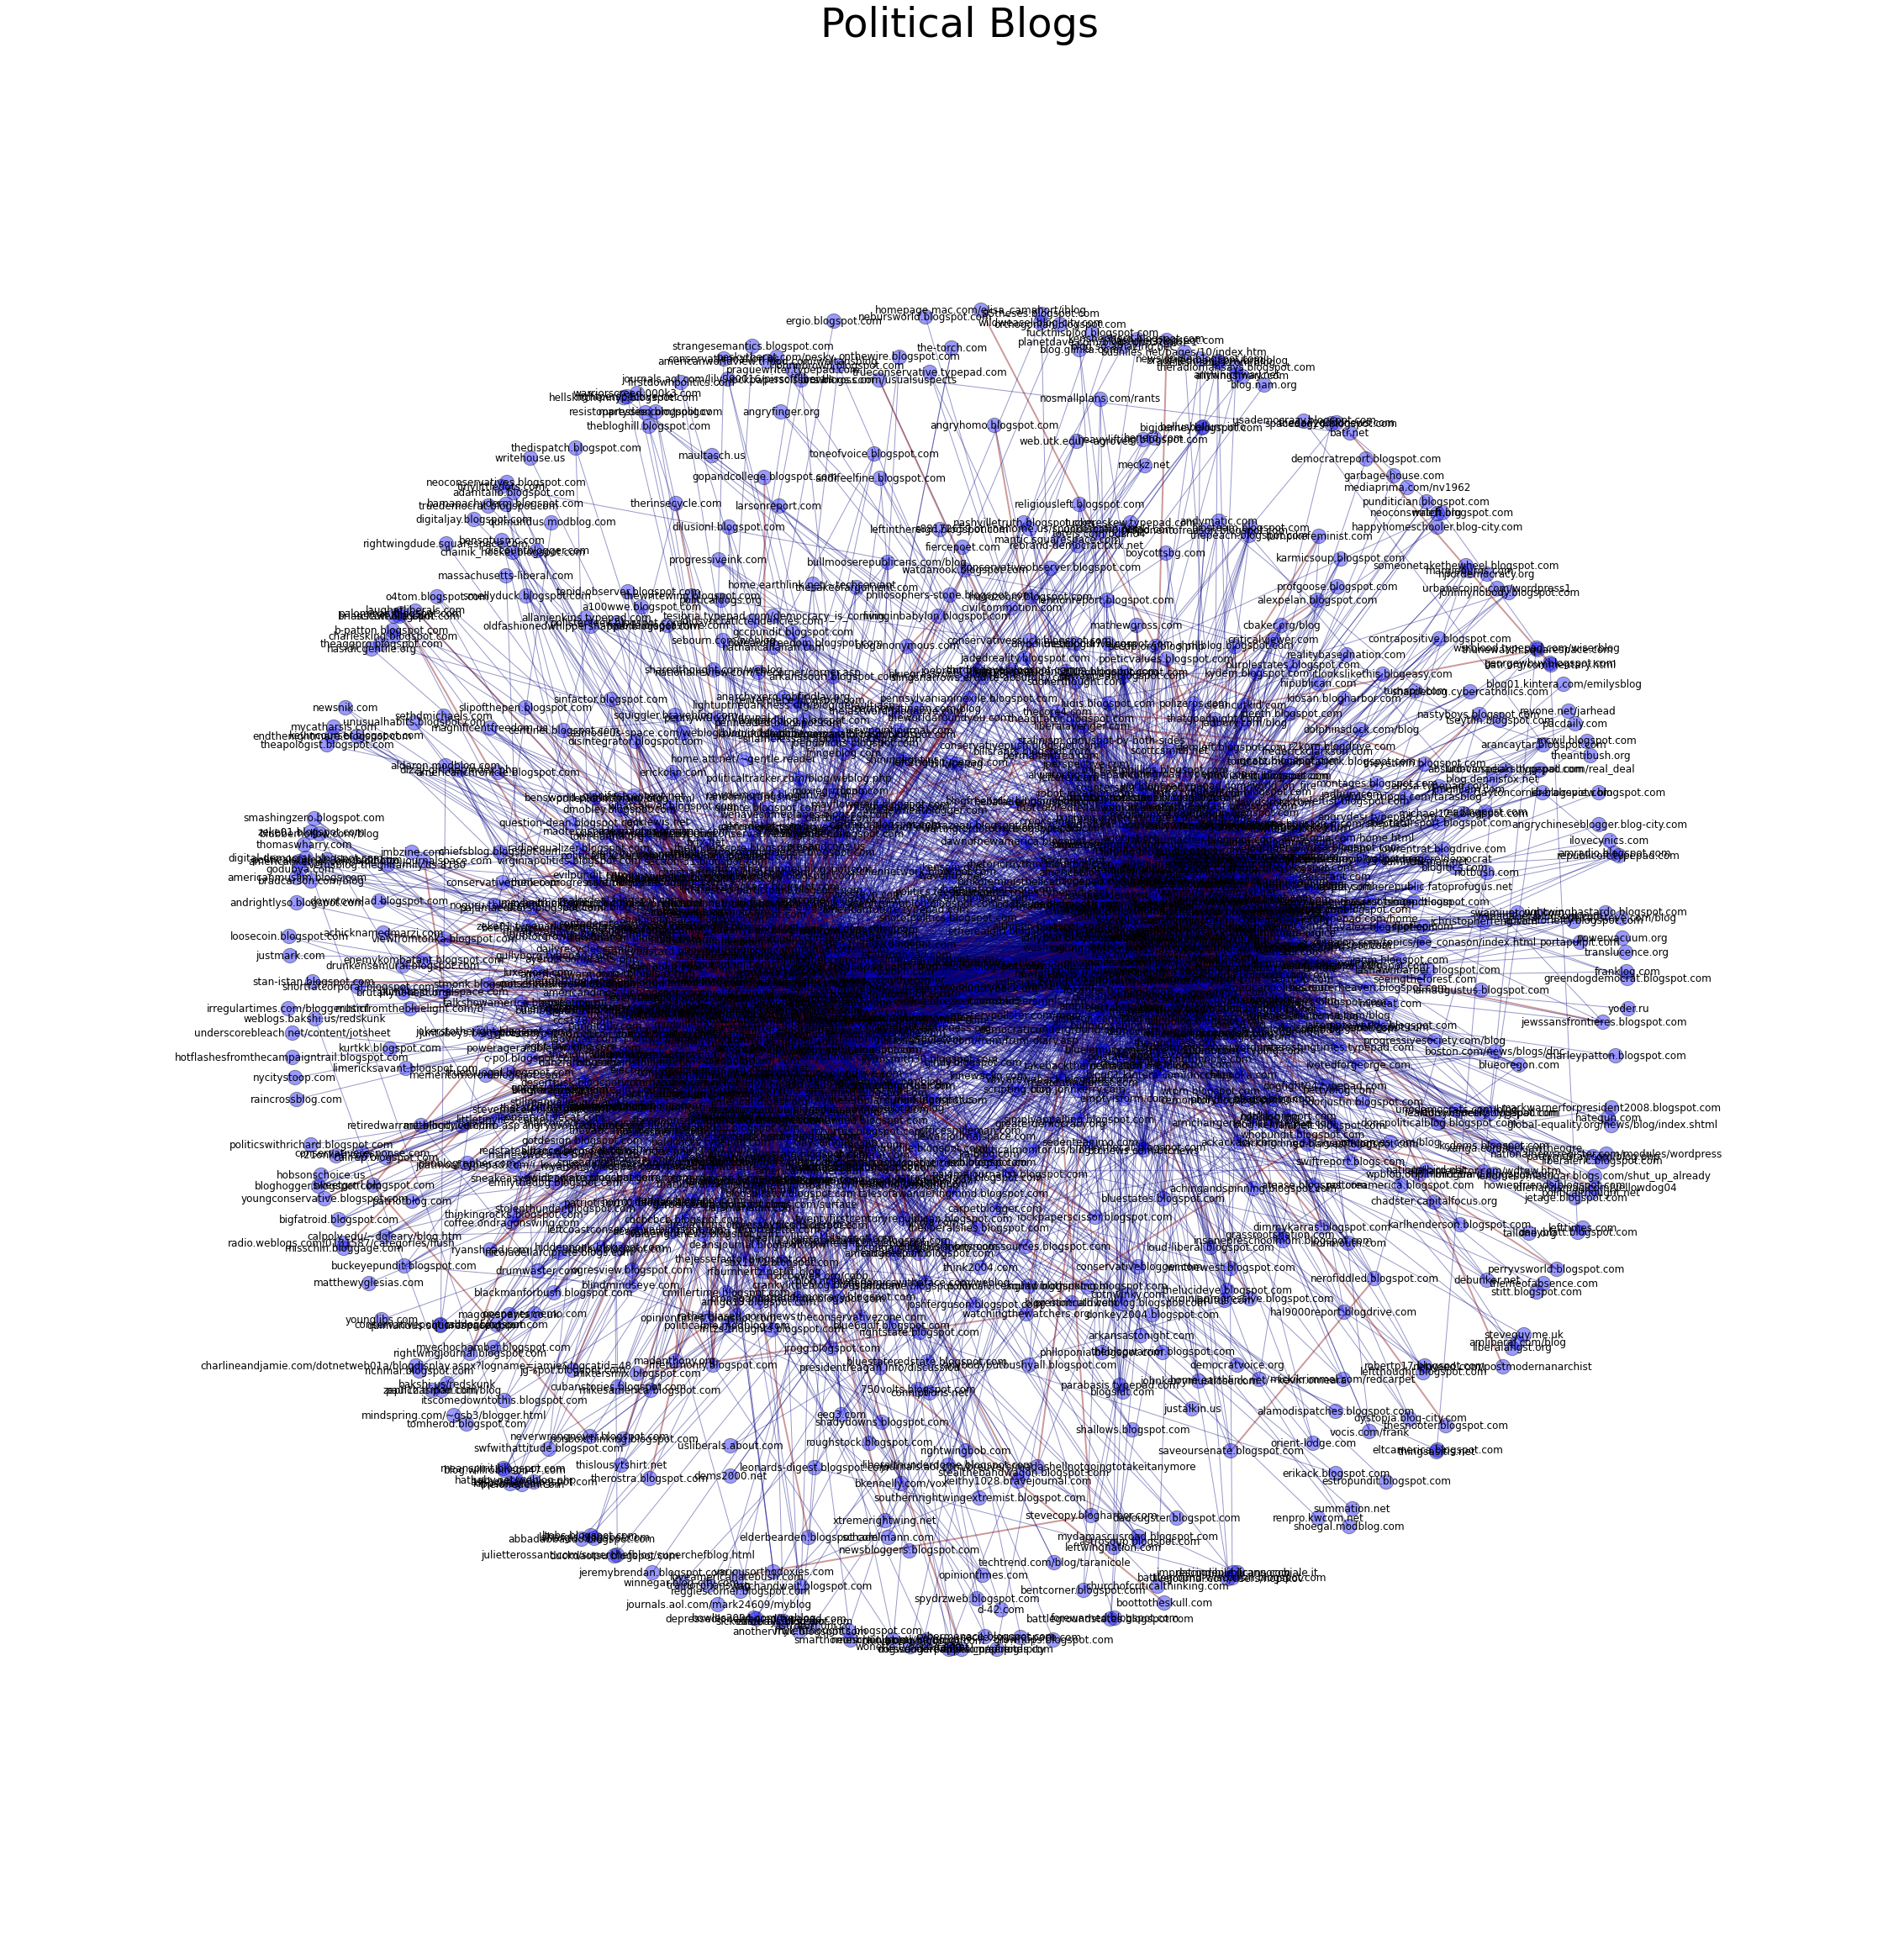

In [11]:
#A prettier graph
plt.figure(figsize=(40,40))
pos=nx.spring_layout(G, iterations=500, scale=5, k=3)
nx.draw_networkx_labels(G, pos, fontsize=10)
nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
# use one of the edge properties to control line thickness
# http://stackoverflow.com/questions/21711184/drawing-a-large-weighted-network-in-networkx-based-on-thickness
edgewidth = [ d['weight'] for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=4,width=edgewidth,edge_color=edgewidth)
plt.title("Political Blogs", fontsize=48)
plt.axis('off')
plt.show()

### 2.  What are the 10 most influential blogs?

In [12]:
#Getting the centrality for G, using code from: 
#https://github.com/mbernico/CS570/blob/master/Boston%20-%201776.ipynb
centrality=nx.eigenvector_centrality(G)

In [13]:
#Getting centrality per node, using code from same
person_list = []
for node in centrality:
    person_list.append((node,centrality[node]))
    
sorted_person_list = person_list.sort(key=lambda x: x[1])

In [14]:
#Creating a dataframe to easily tell top and last 10
sorted_person_df = pd.DataFrame(sorted(person_list, key=lambda x: x[1], reverse=True))
sorted_person_df.columns = ['blog', 'ec']

In [15]:
#Since the dataframe is sorted by the centrality in 
#descending order, the first ten are the most influential
sorted_person_df.head(10)

blog        ec
0      atrios.blogspot.com  0.194808
1             dailykos.com  0.160897
2    washingtonmonthly.com  0.146539
3  digbysblog.blogspot.com  0.142644
4  bodyandsoul.typepad.com  0.141135
5         liberaloasis.com  0.139524
6       tbogg.blogspot.com  0.137036
7    corrente.blogspot.com  0.129418
8    talkingpointsmemo.com  0.127005
9    dneiwert.blogspot.com  0.122376

### 3.  What are the 10 least influential blogs?

In [16]:
#Since the dataframe is sorted by the centrality in 
#descending order, the last ten are the least influential
sorted_person_df.tail(10)

blog            ec
1214                          thingsasitis.net  1.173625e-05
1215                 massachusetts-liberal.com  9.483365e-06
1216                 quimundus.squarespace.com  6.061741e-06
1217                         democratvoice.org  1.023339e-06
1218                                  batr.net  6.796326e-07
1219                  batr.org/commentary.html  6.795518e-07
1220                     quimundus.modblog.com  6.682930e-08
1221  americanworldview.tripod.com/weltansblog  7.491541e-09
1222                            thelonedem.com  1.776325e-72
1223             digital-democrat.blogspot.com  1.776325e-72

That's sad; the lone dem really is almost all alone

###4. Answer this question for both left wing and right wing blogs seperately. (Optional 10 Extra Credit Points)

In [17]:
import community

In [51]:
#Using community to partition graph
#http://blog.dominodatalab.com/social-network-analysis-with-networkx/
parts = community.best_partition(G) 

In [52]:
#Creating a dataframe of the partitions
parts_df = pd.DataFrame({'blog': parts.keys(), 'community': parts.values()})

In [74]:
#Looks like most are in two groups - hopefully left and right
parts_df.community.value_counts()

0     648
1     519
2      36
5       4
7       3
11      2
10      2
9       2
8       2
6       2
4       2
3       2
dtype: int64

In [64]:
#Creating dataframe of just group 0
group_0 = pd.DataFrame(parts_df[parts_df.community == 0])

In [66]:
#Creating dataframe of just group 1
group_1 = pd.DataFrame(parts_df[parts_df.community == 1])

In [69]:
#Joining the group 0 dataframe to the dataframe with the centrality score
ec_0 = pd.merge(group_0, sorted_person_df, on=['blog'])

In [70]:
#Joining the group 1 dataframe to the dataframe with the centrality score
ec_1 = pd.merge(group_1, sorted_person_df, on=['blog'])

In [72]:
#Group 0 looks like the right
ec_0.head(15)

blog  community        ec
0      tsrightdominion.blogspot.com          0  0.008295
1                  rightrainbow.com          0  0.004213
2             datingrepublicans.com          0  0.000311
3   commonsenserunswild.typepad.com          0  0.024774
4                  laughingwolf.net          0  0.015914
5          daddypundit.blogspot.com          0  0.007055
6                cayankee.blogs.com          0  0.034604
7               rabner.blogspot.com          0  0.002709
8                   claycalhoun.com          0  0.012677
9         blogspirator.blogspot.com          0  0.006129
10            thesakeofargument.com          0  0.001876
11              aldaron.modblog.com          0  0.000544
12               brutallyhonest.org          0  0.002449
13                  rightvoices.com          0  0.005973
14                 victorhanson.com          0  0.007763

In [73]:
#Group 1 looks like the left
ec_1.head(15)

blog  community        ec
0   theblogwarrior.blogspot.com          1  0.001889
1                 kippsblog.com          1  0.000322
2                gregpalast.com          1  0.020466
3           roxanne.typepad.com          1  0.065257
4                archpundit.com          1  0.059327
5                 younglibs.com          1  0.000264
6                     one38.org          1  0.032317
7                 blogitics.com          1  0.001968
8         joebrent.blogspot.com          1  0.007665
9              liberalangst.org          1  0.000892
10           lefti.blogspot.com          1  0.023500
11         claudialong.com/blog          1  0.032269
12      blogs.salon.com/0002874          1  0.062024
13      alvintostig.typepad.com          1  0.022282
14              notgeniuses.com          1  0.057292

In [76]:
ec_0 = ec_0.sort_index(by=['ec'], ascending=[False])

In [77]:
ec_1 = ec_1.sort_index(by=['ec'], ascending=[False])

####What are the 10 most influential right-wing blogs?

In [79]:
ec_0.head(10)

blog  community        ec
624        instapundit.com          0  0.105428
355        vodkapundit.com          0  0.058757
226         hughhewitt.com          0  0.058532
75       powerlineblog.com          0  0.055493
235     michellemalkin.com          0  0.052160
206       blogsforbush.com          0  0.052033
21   outsidethebeltway.com          0  0.051312
142      balloon-juice.com          0  0.049527
326        wizbangblog.com          0  0.049097
262             volokh.com          0  0.049015

####What are the 10 least influential right-wing blogs?

In [80]:
ec_0.tail(10)

blog  community        ec
559                            neonbrainiac.nu/mt/blog          0  0.000102
458                                    mostlycajun.com          0  0.000099
81                           andrightlyso.blogspot.com          0  0.000096
407                            brianscott.blogspot.com          0  0.000093
425                               richmar.blogspot.com          0  0.000086
399                             zeph1z.tripod.com/blog          0  0.000057
72                                 zeke01.blogspot.com          0  0.000045
135                           praguewriter.typepad.com          0  0.000041
562  julietterossant.com/superchefblog/superchefblo...          0  0.000038
341                   depressedlonelybored.typepad.com          0  0.000030

Also super sad that depressedlonelybored is the least influential 

####What are the 10 most influential left-wing blogs?

In [81]:
ec_1.head(10)

blog  community        ec
479      atrios.blogspot.com          1  0.194808
496             dailykos.com          1  0.160897
322    washingtonmonthly.com          1  0.146539
461  digbysblog.blogspot.com          1  0.142644
314  bodyandsoul.typepad.com          1  0.141135
511         liberaloasis.com          1  0.139524
420       tbogg.blogspot.com          1  0.137036
440    corrente.blogspot.com          1  0.129418
170    talkingpointsmemo.com          1  0.127005
477    dneiwert.blogspot.com          1  0.122376

####What are the 10 least influential left-wing blogs?

In [82]:
ec_1.tail(10)

blog  community        ec
246                          theapologist.blogspot.com          1  0.000150
94   charlineandjamie.com/dotnetweb01a/blogdisplay....          1  0.000084
183                          truedemocrat.blogspot.com          1  0.000084
240            markwarnerforpresident2008.blogspot.com          1  0.000077
434                                 tinylittledots.com          1  0.000062
327                                    theantibush.org          1  0.000062
239                                 ergio.blogspot.com          1  0.000060
441                                    margieburns.com          1  0.000033
318                          usademocrazy.blogspot.com          1  0.000030
470                            loveamericahatebush.com          1  0.000020